# House Price in King County Prediction Model
### About the dataset
This dataset includes the home sales from 2014-2015 in King County, WA 
* `id` - house's unique id
* `date` - sale date
* `price` - sale price
* `bedrooms` - number of bedrooms
* `bathrooms` - numbers of bathrooms
* `sqft_living` - living space square footage 
* `sqft_lot` - total lot square footage
* `floors` - numbers of floors
* `waterfront` - is the house waterfront (1) or not (0)
* `view` - rating from 0 to 4 of how good the view from the house is
* `condition` - rating from 1 (poor) to 5 (very good) of the condition of the house
* `grade` - rating from 1-13 representing the construction quality of improvements. 1-3 Falls short of minimum building standards (cabins, etc.) 7 is avg grade, 11-13 have high-quality design & construction
* `sqft_above` - square footage of the interior that is above ground level
* `sqft_basement` - square footage of the interior that is below ground level
* `yr_built` - year the house was initially built
* `yr_renovated` - The year of the house’s last renovation (if any)
* `zipcode` - zipcode that the house is located in
* `lat` - the property's latitude
* `long` - the property's longitude
* `sqft_living15` - average interior space square footage of the nearest 15 neighbors
* `sqft_lot15` - average lot square footage of the nearest 15 neighbors


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('data/kc_house.csv',parse_dates=['date'])

In [3]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [4]:
IQR= 6.450000e+05 - 3.219500e+05

In [5]:
6.450000e+05+1.5*IQR

1129575.0

In [6]:
outlier = df[df['price'] > 1129575.0]

In [7]:
toptenzipcode = outlier['zipcode'].value_counts().nlargest(10).index

In [8]:
outlier['zipcode'].value_counts().nlargest(10)

98004    163
98040    117
98112     99
98006     93
98033     63
98105     51
98199     44
98039     44
98119     30
98075     29
Name: zipcode, dtype: int64

In [9]:
df[df['zipcode'].isin(toptenzipcode)].groupby('zipcode')['price'].mean().sort_values(ascending=False)

zipcode
98039    2.160607e+06
98004    1.355927e+06
98040    1.194230e+06
98112    1.095499e+06
98105    8.628252e+05
98006    8.596848e+05
98119    8.494480e+05
98033    8.037195e+05
98199    7.918208e+05
98075    7.905767e+05
Name: price, dtype: float64

<Axes: >

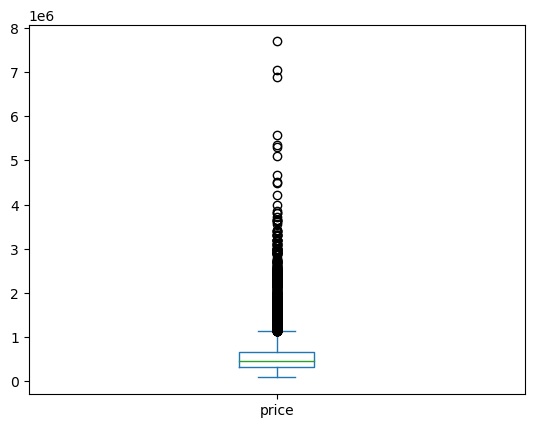

In [10]:
df.price.plot(kind='box')

In [11]:
df.shape

(21613, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Dropping columns that will not be used

In [13]:
test_df = df.drop(columns=['id','lat','long','sqft_living15','sqft_lot15','floors'])

Checking the quality of dataset

In [14]:
test_df['waterfront'].unique()

array([0, 1], dtype=int64)

In [15]:
test_df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [16]:
test_df['grade'].mean()

7.656873178179799

Text(0.5, 1.0, 'bedrooms to price')

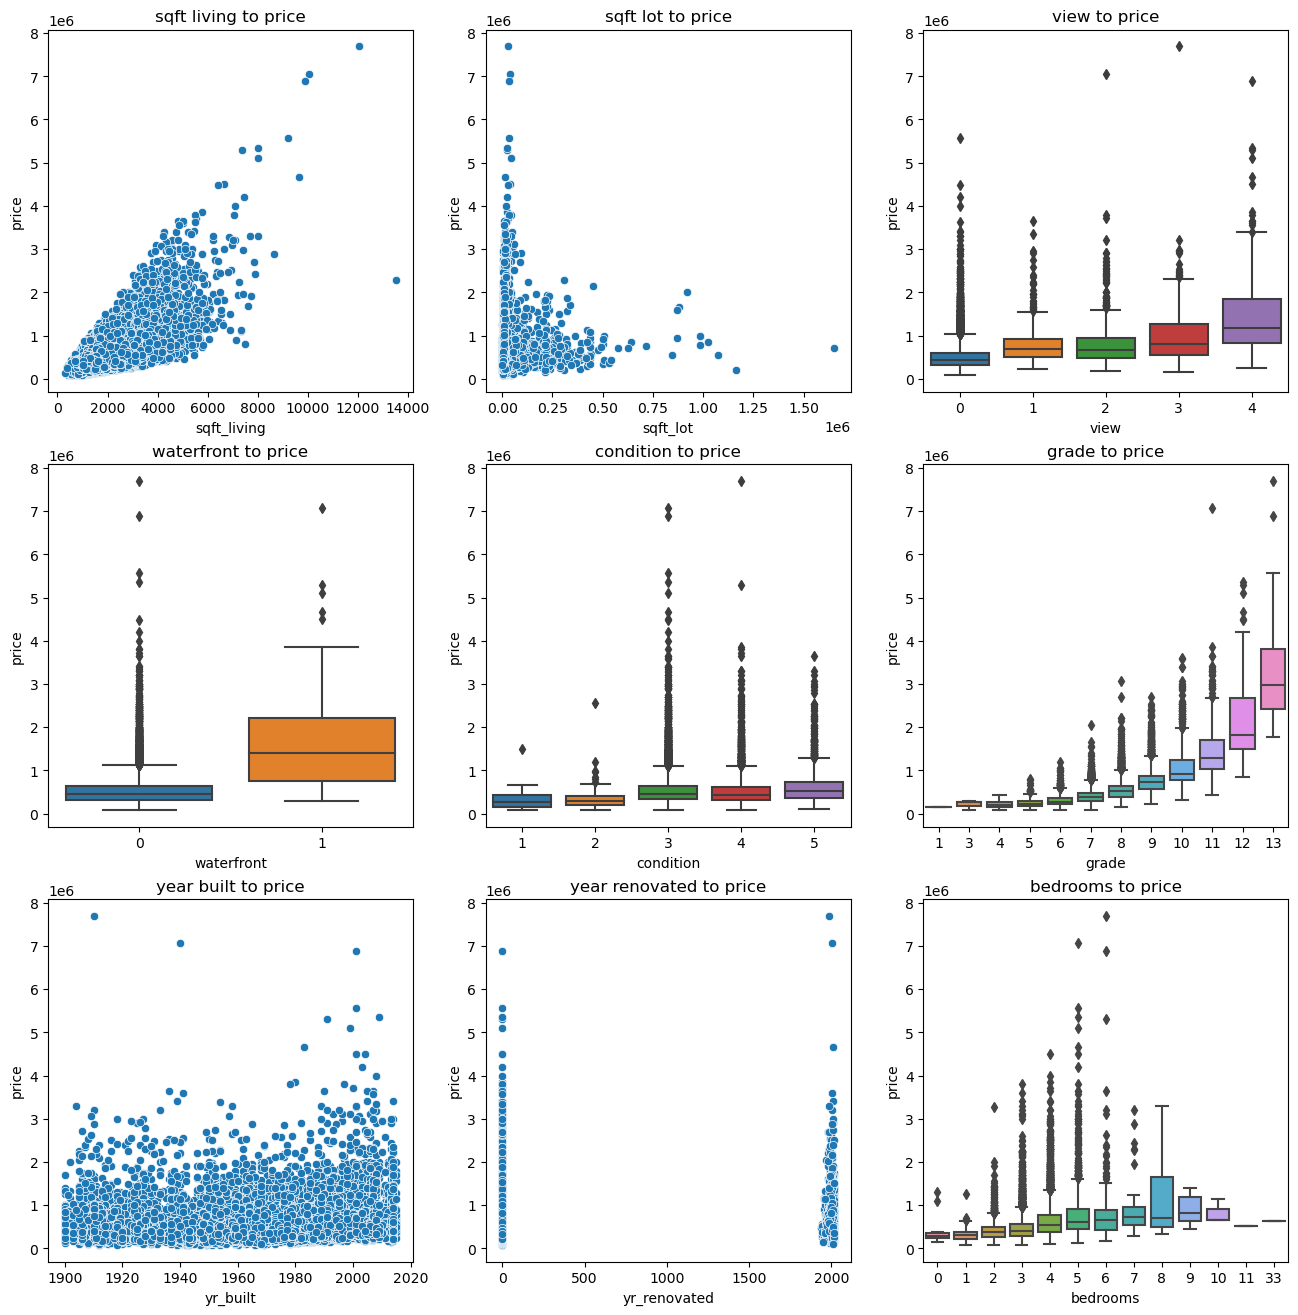

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,16))
plt.tight_layout
sns.scatterplot(data=df,x='sqft_living',y='price',ax=axes[0,0])
axes[0,0].set_title('sqft living to price')

sns.scatterplot(data=df,x='sqft_lot',y='price',ax=axes[0,1])
axes[0,1].set_title('sqft lot to price')

sns.boxplot(data=df,x='view',y='price',ax=axes[0,2])
axes[0,2].set_title('view to price')

sns.boxplot(data=df,x='waterfront',y='price',ax=axes[1,0])
axes[1,0].set_title('waterfront to price')

sns.boxplot(data=df,x='condition',y='price',ax=axes[1,1])
axes[1,1].set_title('condition to price')

sns.boxplot(data=df,x='grade',y='price',ax=axes[1,2])
axes[1,2].set_title('grade to price')

sns.scatterplot(data=df,x='yr_built',y='price',ax=axes[2,0])
axes[2,0].set_title('year built to price')

sns.scatterplot(data=df,x='yr_renovated',y='price',ax=axes[2,1])
axes[2,1].set_title('year renovated to price')

sns.boxplot(data=df,x='bedrooms',y='price',ax=axes[2,2])
axes[2,2].set_title('bedrooms to price')

Based on the charts provided above, it is evident that the square footage of the lot, specifically in the case of smaller lot areas, exhibits a notable degree of price variability. It is a well-established fact that the price per square foot is often influenced by the geographical proximity of the property to the urban center. For instance, residences in closer proximity to the city center, despite featuring smaller lot sizes, frequently command substantially higher selling prices compared to those situated at more remote distances from the urban core.

## Adding and deleting column for prediction model
adding price_per_sqftlot to find the avg per sqft for each zipcode and merge back to the Dataframe

In [18]:
test_df['selling_year']= df['date'].dt.year

In [19]:
test_df.drop(columns=['date'],inplace=True)

In [26]:
test_df.drop(columns=['zipcode'],inplace=True)

In [27]:
X = test_df.drop(['price'],axis=1)
y = test_df['price']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,selling_year,zip_avg_price_per_sqft
6325,3,1.75,1780,13095,0,0,4,9,1780,0,1983,0,2014,36.820255
13473,2,1.00,1000,3700,0,0,3,6,800,200,1929,0,2015,89.797951
17614,3,1.00,1080,7486,0,0,3,6,990,90,1942,0,2015,45.288425
16970,3,2.25,2090,7500,0,0,4,7,1280,810,1977,0,2015,36.904284
20868,2,2.50,1741,1439,0,0,3,8,1446,295,2007,0,2015,65.672437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,0,0,3,7,1000,0,1947,0,2014,80.667156
21575,3,2.50,3087,5002,0,0,3,8,3087,0,2014,0,2014,31.988249
5390,3,2.50,2120,4780,0,0,3,7,2120,0,2004,0,2014,69.010740
860,1,0.75,380,15000,0,0,3,5,380,0,1963,0,2014,26.146627


In [31]:
y_train

6325     325000.0
13473    257000.0
17614    228500.0
16970    288000.0
20868    479000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 17290, dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,selling_year,zip_avg_price_per_sqft
6325,3,1.75,1780,13095,0,0,4,9,1780,0,1983,0,2014,36.820255
13473,2,1.00,1000,3700,0,0,3,6,800,200,1929,0,2015,89.797951
17614,3,1.00,1080,7486,0,0,3,6,990,90,1942,0,2015,45.288425
16970,3,2.25,2090,7500,0,0,4,7,1280,810,1977,0,2015,36.904284
20868,2,2.50,1741,1439,0,0,3,8,1446,295,2007,0,2015,65.672437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,0,0,3,7,1000,0,1947,0,2014,80.667156
21575,3,2.50,3087,5002,0,0,3,8,3087,0,2014,0,2014,31.988249
5390,3,2.50,2120,4780,0,0,3,7,2120,0,2004,0,2014,69.010740
860,1,0.75,380,15000,0,0,3,5,380,0,1963,0,2014,26.146627


In [36]:
model.coef_

array([-2.73883408e+04,  7.89550462e+03,  1.34472086e+02,  9.84762223e-02,
        6.23376771e+05,  4.89542013e+04,  3.32537656e+04,  8.11259903e+04,
        8.90199911e+01,  4.54520950e+01, -1.53755915e+03,  2.41224449e+01,
        3.05380430e+04,  1.69030232e+03])

In [37]:
predicted = model.predict(X_test)

In [38]:
predicted

array([ 443695.3064679 ,  781267.3971173 , 1177851.8391703 , ...,
        448390.68889429,  565554.54457282,  481561.77489373])

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
MAE = mean_absolute_error(y_test,predicted)
MSE = mean_squared_error(y_test,predicted)
RMSE = np.sqrt(MSE)

In [41]:
MAE

124407.87617056105

In [42]:
RMSE

208368.90137495616

In [43]:
test_res = y_test-predicted

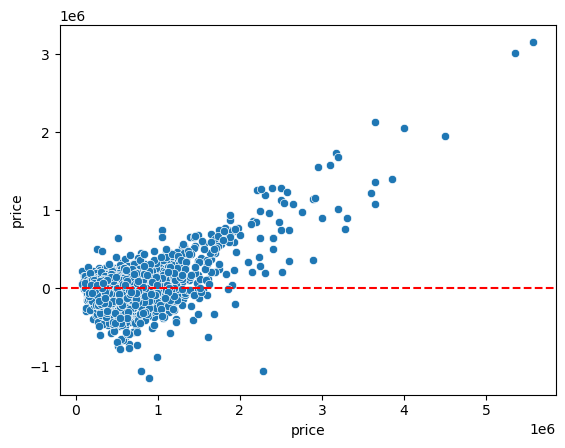

In [44]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='price', ylabel='Density'>

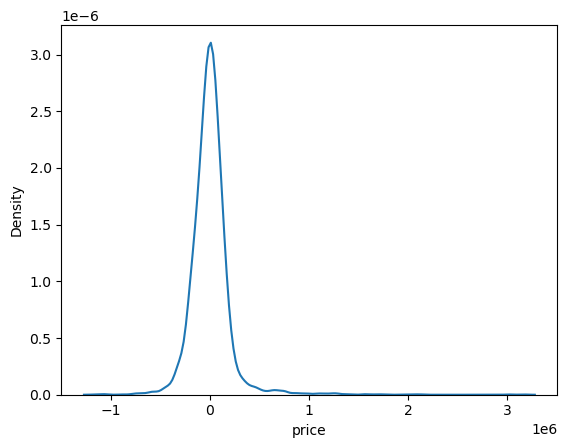

In [45]:
sns.kdeplot(data=test_res)

Based on charts above the model predict very well when the house prices is below 2 million but when the house price go over 2 million the model tend to significantly under-predict. So next I'm going to use the polynomial regression method to see if the model will lower the Root mean square error. 

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [48]:
poly_features = polynomial_converter.fit_transform(X)

In [49]:
poly_features.shape

(21613, 119)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression(fit_intercept=True)

In [52]:
model.fit(X_train,y_train)

LinearRegression()

In [53]:
test_predictions = model.predict(X_test)

In [54]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [55]:
RMSE

173851.76843499579

In [56]:
MAE

102316.61859334572

In [57]:
residual = y_test-test_predictions

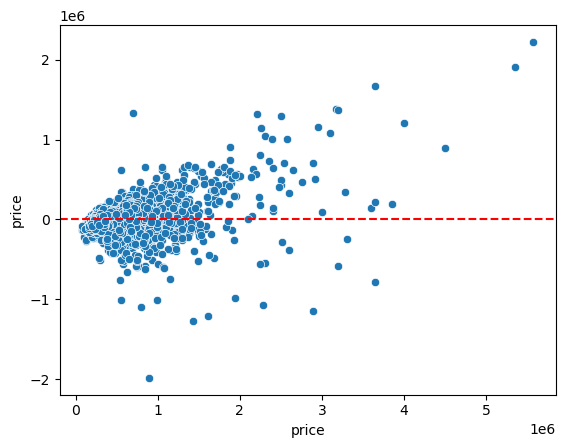

In [58]:
sns.scatterplot(x=y_test,y=residual)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='price', ylabel='Density'>

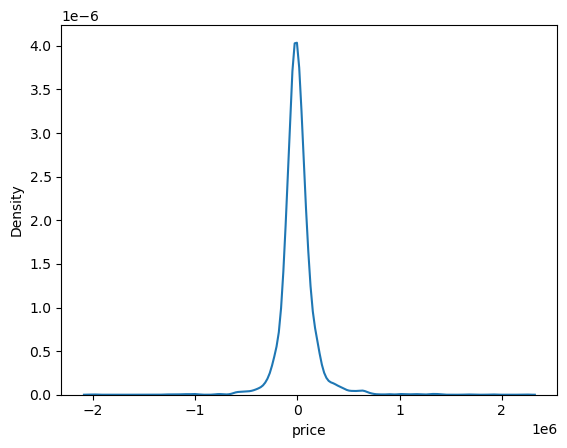

In [59]:
sns.kdeplot(data=residual)

In [60]:
len(residual)

4323